In [1]:
#Importing Pandas and Matplotlib and Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


### Reading in the dataset

In [2]:
df= pd.read_csv('Data/dataset_caps.csv')

### Studying whether any of the variables are highly correlated with each other

In [3]:
df.corr()

,age,sex,cp,rbp,scl,fbs,rer,mhra,eia,std,new_dhd
age,1.000000,0.058179,0.161971,0.240428,-0.091229,0.232110,0.208795,-0.366697,0.199167,0.254805,0.285509
sex,0.058179,1.000000,0.174879,0.001371,-0.197801,0.088660,-0.016069,-0.180025,0.182619,0.102933,0.308392
cp,0.161971,0.174879,1.000000,0.021998,-0.137328,0.046324,0.032497,-0.349508,0.416770,0.247330,0.473443
rbp,0.240428,0.001371,0.021998,1.000000,0.088187,0.159328,0.096457,-0.106844,0.151641,0.160970,0.109798
scl,-0.091229,-0.197801,-0.137328,0.088187,1.000000,0.025164,0.115322,0.235477,-0.036194,0.046726,-0.229004
fbs,0.232110,0.088660,0.046324,0.159328,0.025164,1.000000,0.128377,-0.054908,0.032062,0.052240,0.146087
rer,0.208795,-0.016069,0.032497,0.096457,0.115322,0.128377,1.000000,0.053739,0.032003,0.114411,0.065612
mhra,-0.366697,-0.180025,-0.349508,-0.106844,0.235477,-0.054908,0.053739,1.000000,-0.355075,-0.149286,-0.392371
eia,0.199167,0.182619,0.416770,0.151641,-0.036194,0.032062,0.032003,-0.355075,1.000000,0.392169,0.463133
std,0.254805,0.102933,0.247330,0.160970,0.046726,0.052240,0.114411,-0.149286,0.392169,1.000000,0.386574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
age        916 non-null int64
sex        916 non-null int64
cp         916 non-null int64
rbp        857 non-null float64
scl        886 non-null float64
fbs        827 non-null float64
rer        914 non-null float64
mhra       861 non-null float64
eia        861 non-null float64
std        854 non-null float64
new_dhd    916 non-null int64
dtypes: float64(7), int64(4)
memory usage: 78.8 KB


### Needed to drop NaN values for train test split

In [5]:
df=df.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 915
Data columns (total 11 columns):
age        737 non-null int64
sex        737 non-null int64
cp         737 non-null int64
rbp        737 non-null float64
scl        737 non-null float64
fbs        737 non-null float64
rer        737 non-null float64
mhra       737 non-null float64
eia        737 non-null float64
std        737 non-null float64
new_dhd    737 non-null int64
dtypes: float64(7), int64(4)
memory usage: 69.1 KB


## Logistic Regression
### 1. Defining the X and y variable
### 2. Performing a train test split
### 3. Initiating a Logistic Regression
### 4. Fitting the values 
### 5. Predicting the y values using information from the X test set
### 6. Evaluating using confusion matrix and classification report 
### 7. Plotting ROC Curve
### 8. Computing AUC Test Score 
### 9. Computing test,training Mean Squared Error
### 10. Printing log coefficients, standard errors and odds ratios

In [7]:
#Setting up the Logistic Regress + Cross Validation + Classfication Report
y=df.new_dhd

In [8]:
X=df.drop(['new_dhd'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [10]:
logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred = logreg.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77 20]
 [26 99]]
             precision    recall  f1-score   support

          0       0.75      0.79      0.77        97
          1       0.83      0.79      0.81       125

avg / total       0.80      0.79      0.79       222



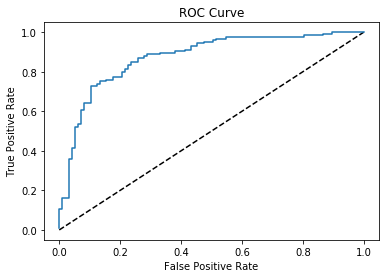

In [14]:
#Plotting ROC Curve
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8738969072164948
AUC scores computed using 5-fold cross-validation: [0.87086153 0.83098592 0.85433655 0.81671609 0.85137139]


In [16]:
from sklearn.metrics import mean_squared_error
print ("Mean squared error on the test set: ")
print (mean_squared_error(y_test, logreg.predict(X_test)))
print ("Mean squared error on the training set: ")
print (mean_squared_error(y_train, logreg.predict(X_train)))

Mean squared error on the test set: 
0.2072072072072072
Mean squared error on the training set: 
0.1883495145631068


In [17]:
logreg.coef_

array([[ 0.00262949,  1.10842865,  0.54240571,  0.00330186, -0.00247255,
         0.40496289,  0.2774469 , -0.01950614,  1.19754824,  0.70192709]])

In [18]:
print(np.std(X))

age      9.394365
sex      0.424680
cp       0.935351
rbp     18.597110
scl     93.694315
fbs      0.356338
rer      0.839239
mhra    25.830005
eia      0.489953
std      1.084126
dtype: float64


In [19]:
np.exp(logreg.coef_)

array([[1.00263295, 3.02959411, 1.72014005, 1.00330732, 0.9975305 ,
        1.49924686, 1.31975604, 0.98068287, 3.31198676, 2.01763714]])

## Random Forest Model
### 1. Initiating a RF 
### 2. Fitting the values 
### 3. Scoring the training and test data 
### 4. Computing test, training Mean Squared Error
### 5. Computing Feature Importance

In [20]:
## Random Forest Regressor ## 

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
rf_train= rf.score(X_train, y_train)
rf_test= rf.score(X_test, y_test)
print(rf_train, rf_test)
print ("Mean squared error on the test set: ")
print (mean_squared_error(y_test, rf.predict(X_test)))
print ("Mean squared error on the training set: ")
print (mean_squared_error(y_train, rf.predict(X_train)))


0.8799995475522577 0.2991208247422681
Mean squared error on the test set: 
0.17243243243243245
Mean squared error on the training set: 
0.030000000000000002


In [24]:
rf.feature_importances_

array([0.13134107, 0.02196621, 0.09466233, 0.09548817, 0.16877651,
       0.00975647, 0.02688943, 0.11850777, 0.25958769, 0.07302433])

Text(0,0.5,'Importance')

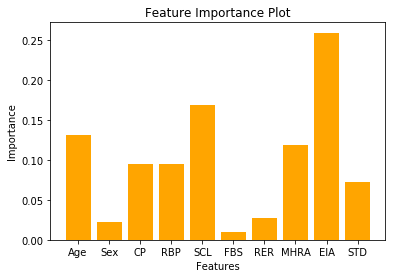

In [27]:
objects=('Age', 'Sex', 'CP', 'RBP', 'SCL', 'FBS', 'RER', 'MHRA', 'EIA', 'STD')
x=[0.13134107, 0.02196621, 0.09466233, 0.09548817, 0.16877651,
       0.00975647, 0.02688943, 0.11850777, 0.25958769, 0.07302433]
plt.bar(np.arange(len(objects)), x, color='orange')
plt.xticks(np.arange(len(objects)), objects)
plt.title('Feature Importance Plot')
plt.xlabel('Features')
plt.ylabel('Importance')